In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('./Dataset/symptoms_final_dataset.csv')

In [3]:
df1.head()

,code,name,symptoms,description,test_procedure,medication_desc,medications,symptom_desc,risk_years,less_risk_years,high_risk_race_ethnicity,high_risk_gender,less_risk_race_ethnicity,less_risk_gender
0,105,Panic disorder,"{'Anxiety and nervousness': '88', 'Depression'...",Panic disorder is an anxiety disorder charact...,"['Psychotherapy', 'Mental health counseling', ...",The most commonly prescribed drugs for patient...,"['Lorazepam', 'Alprazolam (Xanax)', 'Clonazepa...",Within all the people who go to their doctor w...,['30-44'],"['1-4', '< 1']",['NA'],['NA'],['NA'],['NA']
1,106,Vocal cord polyp,"{'Hoarse voice': '91', 'Sore throat': '47', 'D...",Vocal cord polyp is encountered rarely on Sym...,"['Tracheoscopy and laryngoscopy with biopsy', ...",The most commonly prescribed drugs for patient...,"['Esomeprazole (Nexium)', 'Beclomethasone Nasa...",Within all the people who go to their doctor w...,"['60-74', '45-59']",['NA'],['NA'],['NA'],['NA'],['NA']
2,107,Turner syndrome,"{'Groin mass': '27', 'Leg pain': '27', 'Hip pa...","Also known as Gonadal Dysgenesis, XO Syndrome...","['Complete physical skin exam performed (ML)',...",The most commonly prescribed drugs for patient...,"['Somatropin', 'Sulfamethoxazole (Bactrim)', '...",Within all the people who go to their doctor w...,"['5-14', '1-4']","['75+', '60-74']",['other'],['female'],['NA'],['NA']
3,108,Cryptorchidism,"{'Symptoms of the scrotum and testes': '50', '...","Also known as Undescended Testes, Cryptorchis...","['Complete physical skin exam performed (ML)',...",The most commonly prescribed drugs for patient...,"['Haemophilus B Conjugate Vaccine (Obsolete)',...",Within all the people who go to their doctor w...,"['5-14', '1-4', '< 1']","['75+', '60-74']","['other', 'hispanic']",['male'],['NA'],['female']
4,109,Poisoning due to ethylene glycol,"{'Abusing alcohol': '78', 'Fainting': '64', 'H...",Also known as Anti Freeze Poisoning and Ethyl...,"['Intravenous fluid replacement', 'Hematologic...",The most commonly prescribed drugs for patient...,"['Lorazepam', 'Thiamine', 'Naloxone (Suboxone)...",Within all the people who go to their doctor w...,"['15-29', '45-59']","['75+', '5-14', '1-4']",['NA'],['NA'],['other'],['NA']


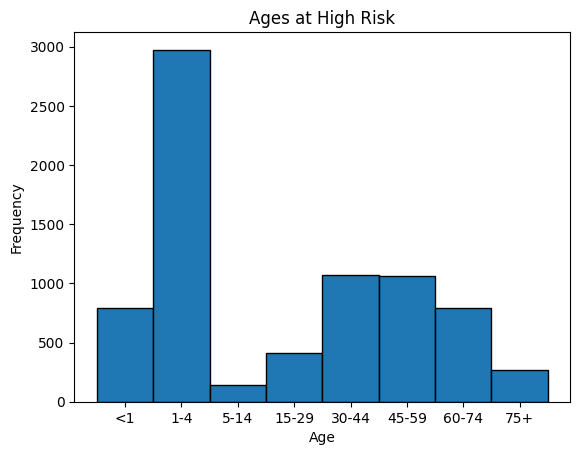

In [4]:
filtered_risk_years = [age for age_range in df1['risk_years'] if age_range != 'NA' for age in age_range]
filtered_risk_years += ['<1']
ordered_age_ranges = ['<1', '1-4', '5-14', '15-29', '30-44', '45-59', '60-74', '75+']
plt.hist(filtered_risk_years, bins=np.arange(len(ordered_age_ranges) + 1) - 0.5, edgecolor='black', align='left')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages at High Risk')
plt.xticks(np.arange(len(ordered_age_ranges)) - 0.5, ordered_age_ranges)
plt.show()

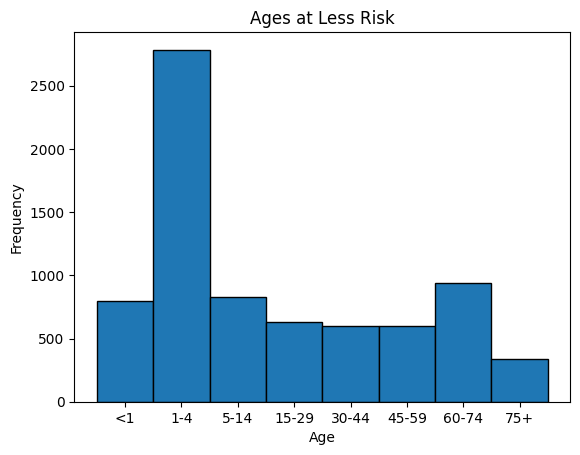

In [5]:
filtered_risk_years = [age for age_range in df1['less_risk_years'] if age_range != 'NA' for age in age_range]
filtered_risk_years += ['<1']
ordered_age_ranges = ['<1', '1-4', '5-14', '15-29', '30-44', '45-59', '60-74', '75+']
plt.hist(filtered_risk_years, bins=np.arange(len(ordered_age_ranges) + 1) - 0.5, edgecolor='black', align='left')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages at Less Risk')
plt.xticks(np.arange(len(ordered_age_ranges)) - 0.5, ordered_age_ranges)
plt.show()

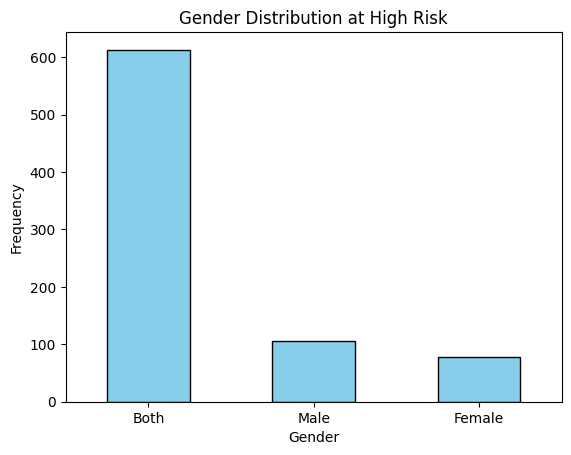

In [6]:
# Pie Chart
gender_counts = df1['high_risk_gender'].value_counts()
ax = gender_counts.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution at High Risk')
plt.xticks(rotation=0)
ax.set_xticklabels(['Both', 'Male', 'Female'])
plt.show()

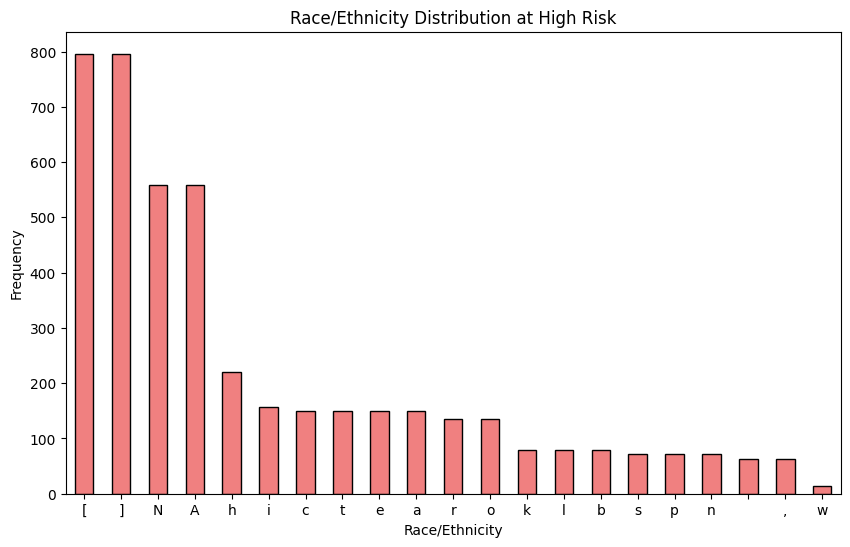

In [7]:
# Stacked Bar Chart
filtered_high_risk_race = [race for race_list in df1['high_risk_race_ethnicity'] if race_list != '[NA]' for race in race_list]
race_counts = pd.Series(filtered_high_risk_race).value_counts()
race_counts = race_counts.iloc[1:]
plt.figure(figsize=(10, 6))
ax = race_counts.plot(kind='bar', edgecolor='black', color='lightcoral')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Race/Ethnicity Distribution at High Risk')
plt.xticks(rotation=0)
plt.show()

In [8]:
# Bar Chart
symptom_names = [symptom for symptoms_dict in df1['symptoms'] if symptoms_dict != {} for symptom in symptoms_dict.keys()]
symptom_counts = pd.Series(symptom_names).value_counts().sort_values(ascending=False)
top_10_symptoms = symptom_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_symptoms.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.title('Top 10 Symptoms Distribution')
plt.xticks(rotation=45, ha='right')
plt.show()

AttributeError: 'str' object has no attribute 'keys'